    Pipeline Used:
       Stopwords-number removal 
       Lemmatizing 
       TF/IDF
       Dimension Reduction(SVD)
       Many algorithms.
    

In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
import os
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC 
import os
import pickle

In [2]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC #support vector classifier
from sklearn.linear_model import SGDClassifier
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')
import os

In [4]:
final_df=pd.read_excel("processed_data.xlsx")
labels=final_df["sentiment"].copy()

# Dimension Reduction

In [7]:
vectorizer=TfidfVectorizer()
X_train, X_test, y_train, y_test = train_test_split(final_df["review"], labels, test_size=0.20, random_state=1,stratify=labels)
vectors_train=vectorizer.fit_transform(X_train)

In [8]:
vectors_test=vectorizer.transform(X_test) 
#Sparse matrix
vectors_test

<10000x148593 sparse matrix of type '<class 'numpy.float64'>'
	with 940002 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.decomposition import TruncatedSVD

In [10]:
svd = TruncatedSVD(n_components=800, n_iter=1, random_state=1) #variable number of components
reduced_vectors_train=svd.fit_transform(vectors_train)

In [11]:
reduced_vectors_train.shape 

(40000, 800)

In [12]:
reduced_vectors_test=svd.transform(vectors_test)
reduced_vectors_test.shape

(10000, 800)

# Initialize-fit the classifier - Test

In [13]:
classifier=LogisticRegression(random_state=1)
#Stritified results means that the proportion of the labels is kept in the test-set

In [14]:
classifier.fit(X=reduced_vectors_train,y=y_train)
classifier.score(X=reduced_vectors_test,y=y_test) #accuracy

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8744

In [15]:
predicted_labels=classifier.predict(reduced_vectors_test)
names=y_test.unique()

In [16]:
print(metrics.classification_report(y_test, predicted_labels,labels.unique().sort()))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5000
           1       0.86      0.89      0.88      5000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [17]:
metrics.confusion_matrix(y_test, predicted_labels)

array([[4271,  729],
       [ 527, 4473]], dtype=int64)

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


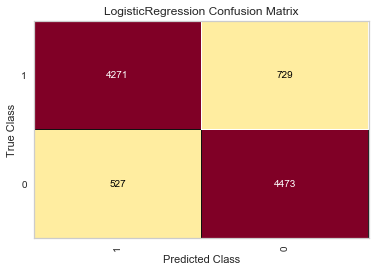

In [18]:
model = LogisticRegression(random_state=1)

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=labels.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(reduced_vectors_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(reduced_vectors_test, y_test)

# How did we do?
cm.poof()

In [19]:
#training accuracy
classifier.score(X=reduced_vectors_train,y=y_train) #accuracy

0.880275

In [20]:
predicted_labels=classifier.predict(reduced_vectors_train)

In [21]:
print(metrics.classification_report(y_train, predicted_labels,labels.unique().sort()))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     20000
           1       0.87      0.89      0.88     20000

    accuracy                           0.88     40000
   macro avg       0.88      0.88      0.88     40000
weighted avg       0.88      0.88      0.88     40000



# SVM using Gradient Descent

In [22]:
classifier_svm=SGDClassifier(loss='hinge', penalty='l2', random_state=1,max_iter=1000)

In [23]:
classifier_svm.fit(X=reduced_vectors_train,y=y_train)
classifier_svm.score(X=reduced_vectors_test,y=y_test)

0.8752

In [24]:
predicted_labels=classifier_svm.predict(reduced_vectors_test)

In [25]:
print(metrics.classification_report(y_test, predicted_labels,labels.unique().sort()))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5000
           1       0.86      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [26]:
#Training accuracy
classifier_svm.score(X=reduced_vectors_train,y=y_train)

0.879425

In [27]:
predicted_labels=classifier_svm.predict(reduced_vectors_train)

In [28]:
print(metrics.classification_report(y_train, predicted_labels,labels.unique().sort()))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     20000
           1       0.87      0.89      0.88     20000

    accuracy                           0.88     40000
   macro avg       0.88      0.88      0.88     40000
weighted avg       0.88      0.88      0.88     40000



# Kernel SVM 

In [29]:
from sklearn.svm import SVC
classifier_svm=SVC( kernel="poly", random_state=1,max_iter=1000)


In [30]:
classifier_svm.fit(reduced_vectors_train,y_train)

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=1000, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
classifier_svm.score(reduced_vectors_test,y_test)

0.5

In [32]:
predicted_labels=classifier_svm.predict(reduced_vectors_test)
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.50      0.00      0.00      5000
           1       0.50      1.00      0.67      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.33     10000
weighted avg       0.50      0.50      0.33     10000



In [33]:
#training accuracy 
classifier_svm.score(reduced_vectors_train,y_train)


0.50055

In [34]:
predicted_labels=classifier_svm.predict(reduced_vectors_train)
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.70      0.00      0.00     20000
           1       0.50      1.00      0.67     20000

    accuracy                           0.50     40000
   macro avg       0.60      0.50      0.34     40000
weighted avg       0.60      0.50      0.34     40000



In [35]:
classifier_svm=SVC(kernel="rbf", random_state=1,max_iter=1000)
classifier_svm.fit(reduced_vectors_train,y_train)
classifier_svm.score(reduced_vectors_test,y_test)

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.6425

In [36]:
classifier_svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=1000, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
predicted_labels=classifier_svm.predict(reduced_vectors_test)
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.92      0.31      0.47      5000
           1       0.59      0.97      0.73      5000

    accuracy                           0.64     10000
   macro avg       0.75      0.64      0.60     10000
weighted avg       0.75      0.64      0.60     10000



In [38]:
#training accuracy 
classifier_svm.score(reduced_vectors_train,y_train)

0.63835

In [39]:
predicted_labels=classifier_svm.predict(reduced_vectors_train)
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.93      0.30      0.45     20000
           1       0.58      0.98      0.73     20000

    accuracy                           0.64     40000
   macro avg       0.76      0.64      0.59     40000
weighted avg       0.76      0.64      0.59     40000

